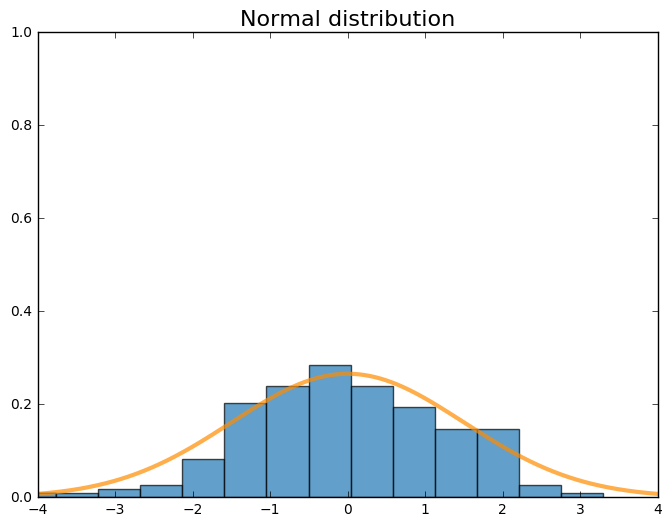

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
from ipywidgets import *
from IPython.display import display, clear_output

# Set size of data
n = 200

# Set number of bins
bin_num = 15

# Set standard deviation range
sigma_min = 0.5
sigma_max = 1.5
stepsize = 0.1

# Compute size of range of sigma
sigma_num = int((sigma_max - sigma_min)/stepsize)

# Create figure
fig, ax = plt.subplots(figsize=(8,6))

# Set range of x values
x = np.arange(-4, 4, 0.01)

# Create sample data for each value of sigma
sample_list = [np.random.normal(0, s, n) for s in np.arange(sigma_min, sigma_max+stepsize, stepsize)]
xmin_list = list(map(lambda x: min(x), sample_list))
xmax_list = list(map(lambda x: max(x), sample_list))
xlength_list = list(map(lambda x, y: y - x, xmin_list, xmax_list))
binwidth_list = list(map(lambda x: x/bin_num, xlength_list))
bins_list = list(map(lambda x, y, z: np.arange(x, y, z), xmin_list, xmax_list, binwidth_list))

# Create button and progress bar
button = widgets.Button(description="Click me to sample")
progress = IntProgress(min=0, max=100, step=1)

sample = 0
# Code for sampling animation
def on_button_clicked(b):
    sigma = w.kwargs['sigma']
    indx = int((sigma - sigma_min)/stepsize)
    sample = sample_list[indx]
    bins = bins_list[indx]
    for i in range(5, n+1, 5):
        clear_output(wait=True)
        plt.figure(figsize=(8,6))
        plt.hist(sample[:i], bins=bins, weights=[1/(n*binwidth_list[indx])]*i, color='#1f77b4', alpha=0.7)
        plt.plot(x,norm.pdf(x, 0, sigma), color='darkorange', lw=3, alpha=0.7)
        plt.axis([-4, 4, 0, 1])
        plt.title('Normal distribution', fontsize=16)
        progress.value=int(i/n*100)
        if i == n:
            progress.bar_style='success'
        else:
            progress.bar_style='danger'
        plt.show()

# Code for interactive Gaussian distribution curve
def plot_gaussian(sigma):
    indx = int((sigma - sigma_min)/stepsize)
    plt.close()
    plt.figure(figsize=(8,6))
    plt.plot(x,norm.pdf(x, 0, sigma), color='darkorange', lw=3, alpha=0.7)
    plt.axis([-4, 4, 0, 1])
    plt.title('Normal distribution', fontsize=16)

# Button activation
button.on_click(on_button_clicked)

# Put button and progress bar side by side
hor = HBox(children=(button, progress))

# Interaction activation 
w = interactive(plot_gaussian, sigma=FloatSlider(description='$\sigma$', min=sigma_min, max=sigma_max, value=1, readout_format='.1f'), continuous_update=False)
display(w, hor)